## Рк №1, Столяров, ИУ5-63Б
## Вариант 18

1. Для одной из колонок провести масштабирование.<br>
2. Произвести кодирование двумя способами ещё для одной колонки.<br>
3. Для одной из колонок сделать ящик с усами.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('dcMarvel/dc-wikia-data.csv', sep=",")

In [8]:
data.shape

(6896, 13)

In [9]:
data.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR'],
      dtype='object')


## Масштабирование для колонки YEAR методом MiniMaxScaler
Будем масштабировать минимаксом.

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
sc1 = MinMaxScaler()

In [91]:
data['APPEARANCES'].replace('', np.nan, inplace=True)
data.dropna(subset=['APPEARANCES'], inplace=True)
data_norm_by_year1 = sc1.fit_transform(data[['APPEARANCES']])

data_norm_by_year1

array([[1.        ],
       [0.80692109],
       [0.50582147],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

## Ящик с усами :)

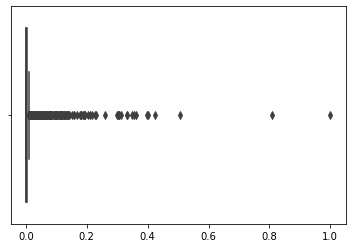

In [92]:
sns.boxplot(data_norm_by_year1)

Видно, что масштабирование было произведено. Ящик с усами не очень уместен в данной ситуации, но он позволяет визуализировать одномерные массивы данных. В на графике видно, что минимакс масштабирование выполнено корректно.

## Кодирование колонки HAIR с помощью методов LabelEncoder и OneHotEncoder

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [33]:
cat_enc = pd.DataFrame({'c1':data["HAIR"]})

In [35]:
cat_enc['c1'].unique()

array(['Black Hair', 'Brown Hair', 'White Hair', 'Blond Hair', 'Red Hair',
       nan, 'Green Hair', 'Strawberry Blond Hair', 'Grey Hair',
       'Silver Hair', 'Orange Hair', 'Purple Hair', 'Gold Hair',
       'Blue Hair', 'Reddish Brown Hair', 'Pink Hair', 'Violet Hair',
       'Platinum Blond Hair'], dtype=object)

Заменим пустые ячейки на строку None

In [45]:
cat_enc['c1'].replace(np.nan, 'None', inplace=True)

In [48]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [49]:
cat_enc['c1'].unique()

array(['Black Hair', 'Brown Hair', 'White Hair', 'Blond Hair', 'Red Hair',
       'None', 'Green Hair', 'Strawberry Blond Hair', 'Grey Hair',
       'Silver Hair', 'Orange Hair', 'Purple Hair', 'Gold Hair',
       'Blue Hair', 'Reddish Brown Hair', 'Pink Hair', 'Violet Hair',
       'Platinum Blond Hair'], dtype=object)

Получили 18 уникальных признаков:

In [50]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [52]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [53]:
cat_enc.shape

(6481, 1)

In [54]:
cat_enc_ohe.shape

(6481, 18)

И видно, что oneHotEncode тоже выполнен корректно:

In [56]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

## Чуть более наглядный ящик с усами для причёсок героев комиксов

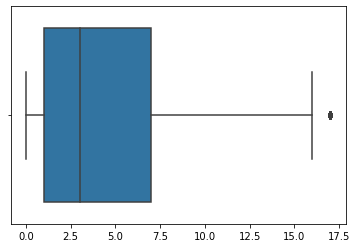

In [62]:
sns.boxplot(cat_enc_le)